In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [27]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [28]:
train_data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,84967.000000,84967.000000,84967.000000,84967.000000,84705.00000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000,84967.000000
mean,42483.000000,40.128426,1295.579531,14.044111,14.29147,3.030930,2.844963,3.412325,3.494580,2.975991,3.530029,3.601245,3.498205,3.427672,3.304389,3.745937,2.865465,3.545341,3.735744
std,24528.004498,14.467548,1051.170909,37.528018,37.85288,1.534362,1.462059,1.242356,1.352494,1.308296,1.259314,1.291335,1.289861,1.282953,1.311501,1.161421,1.429284,1.293977,1.167693
min,0.000000,7.000000,31.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21241.500000,29.000000,438.000000,0.000000,0.00000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,42483.000000,41.000000,925.000000,0.000000,0.00000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,63724.500000,51.000000,1979.000000,11.000000,12.00000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000
max,84966.000000,85.000000,4983.000000,1592.000000,1584.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [29]:
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

In [30]:
display(train_data.head())

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


In [31]:
print(train_data.isna().sum())
print()
print(test_data.isna().sum())


ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             262
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<Figure size 1500x800 with 0 Axes>

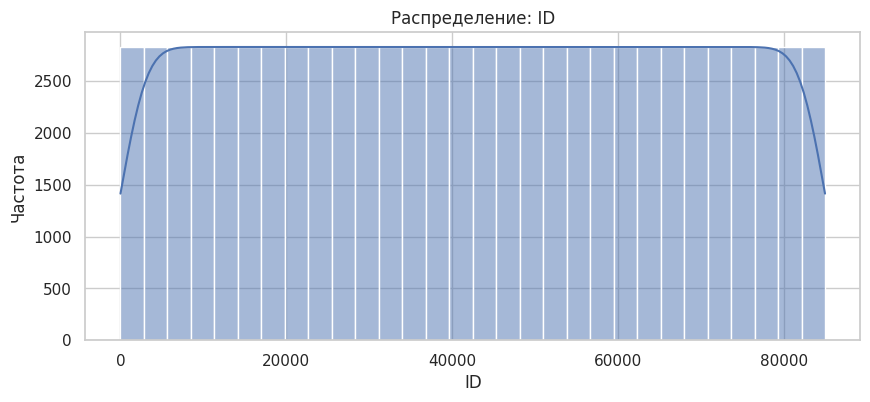

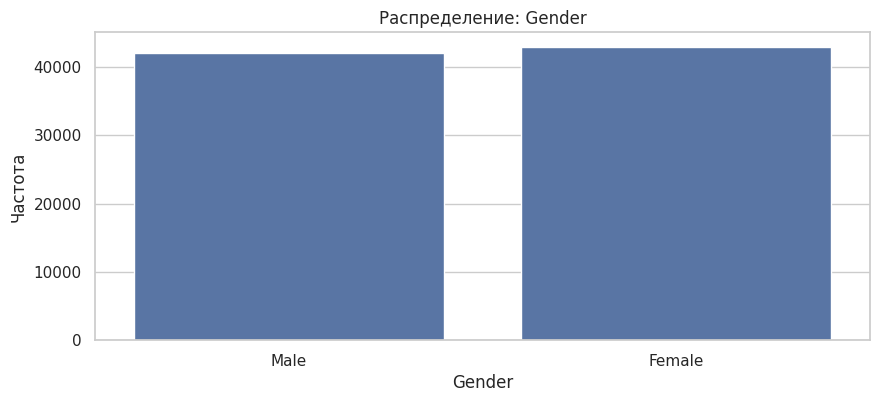

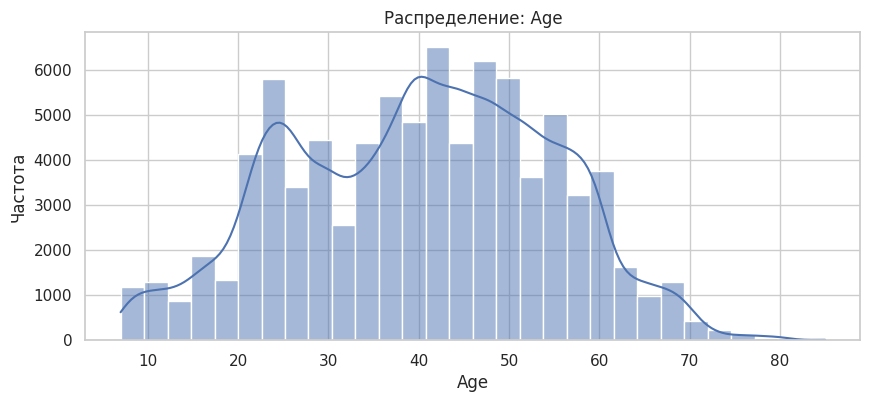

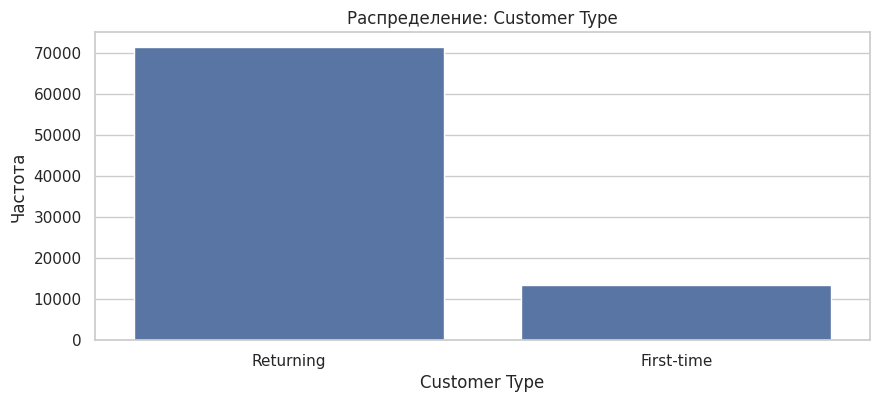

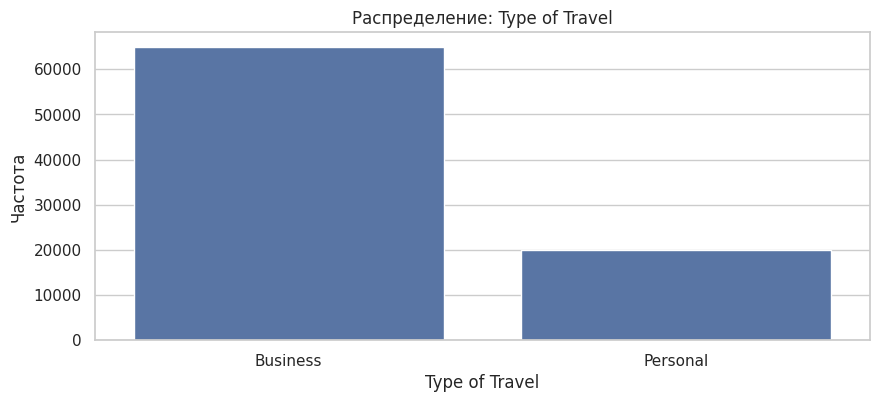

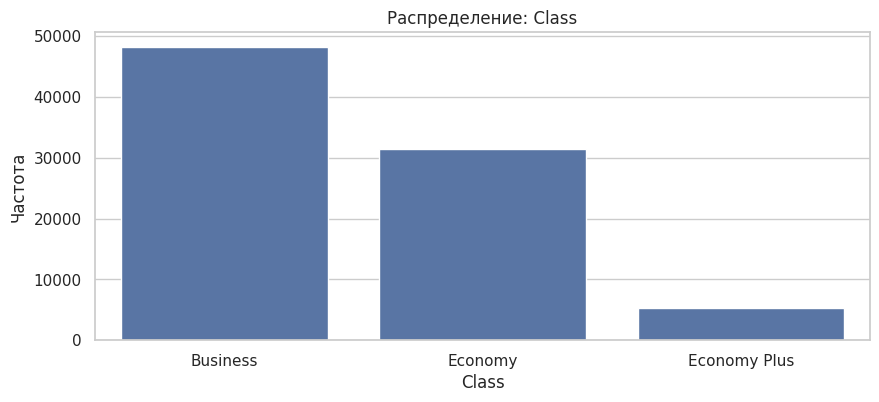

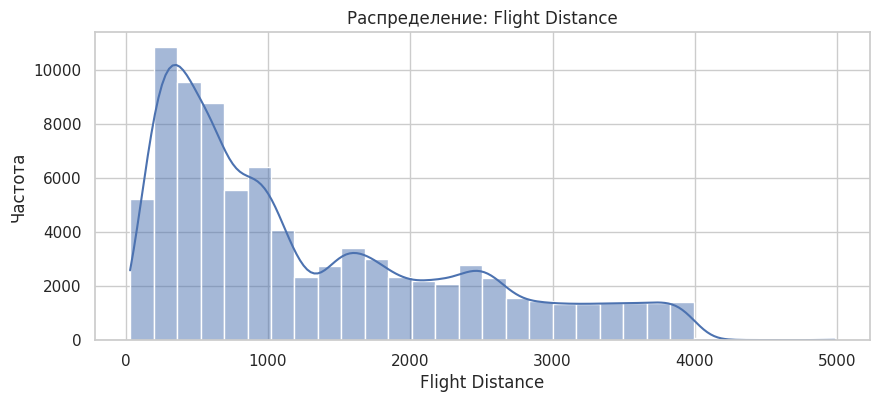

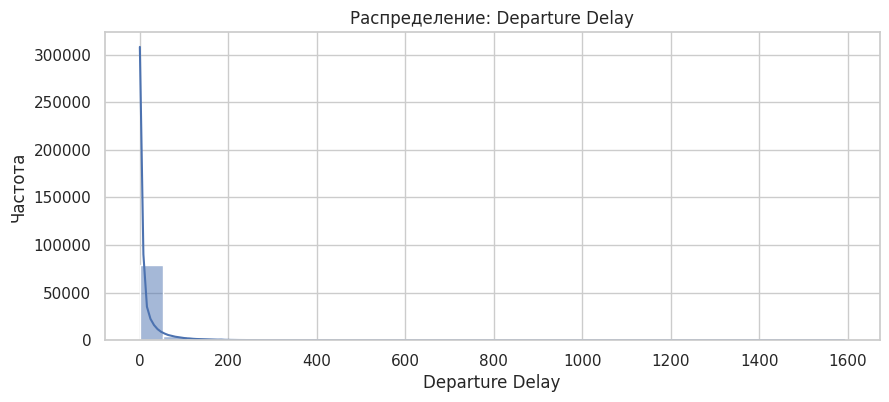

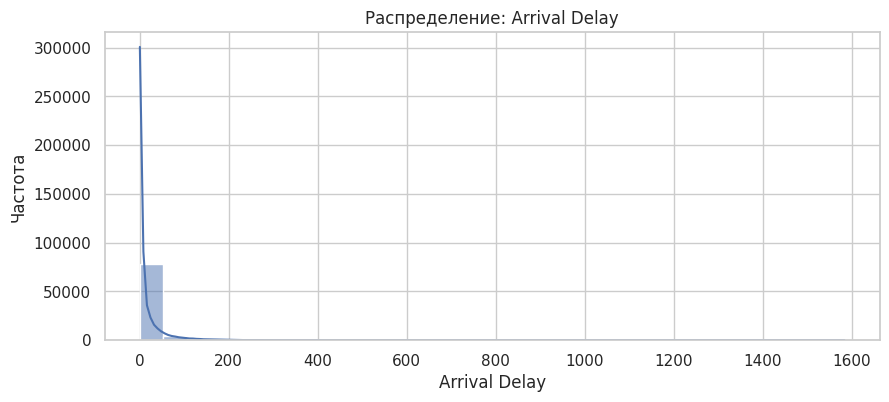

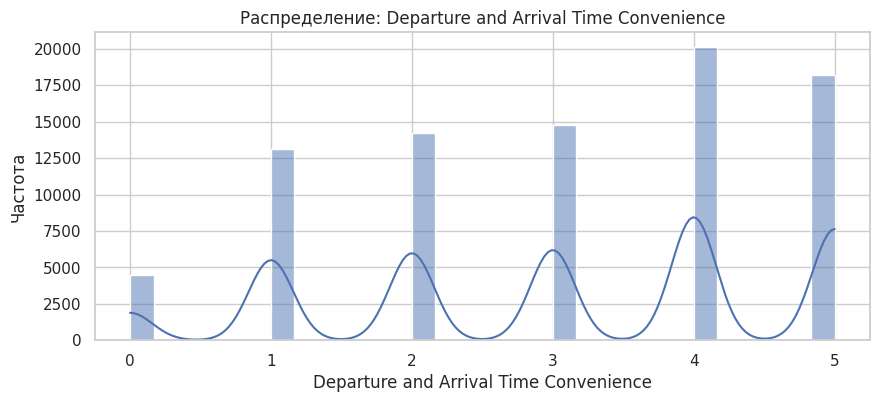

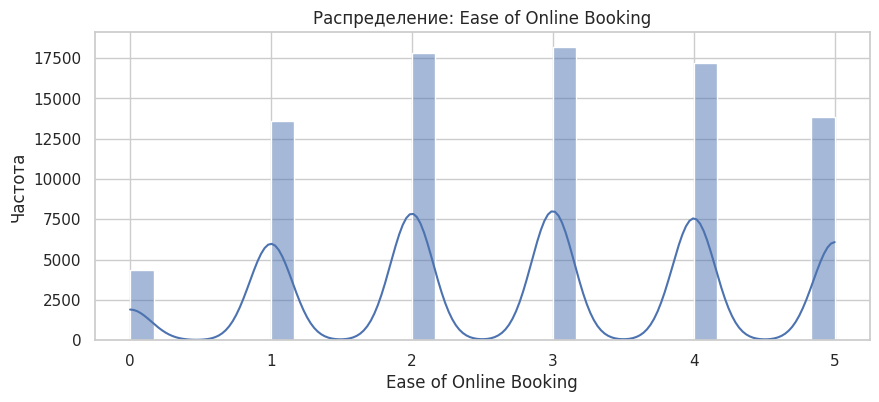

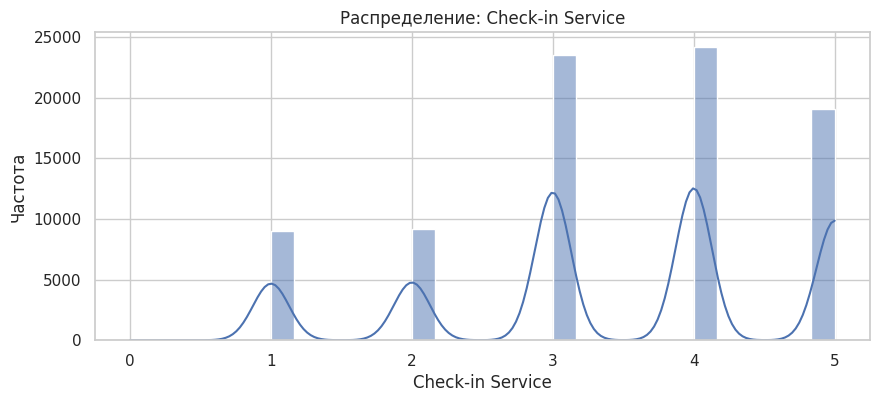

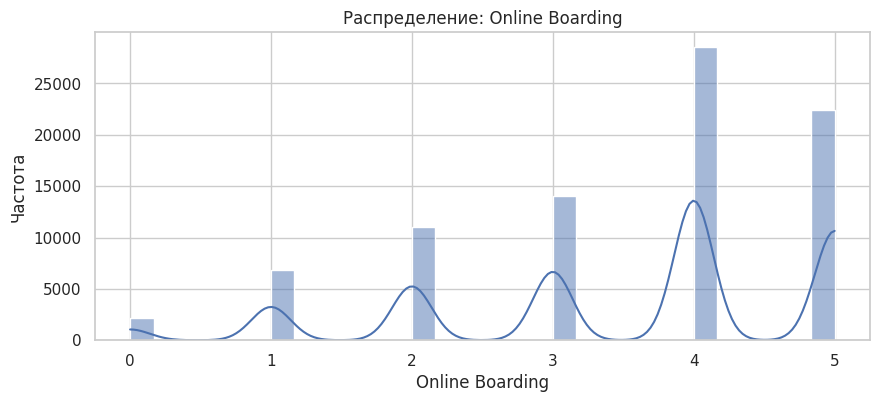

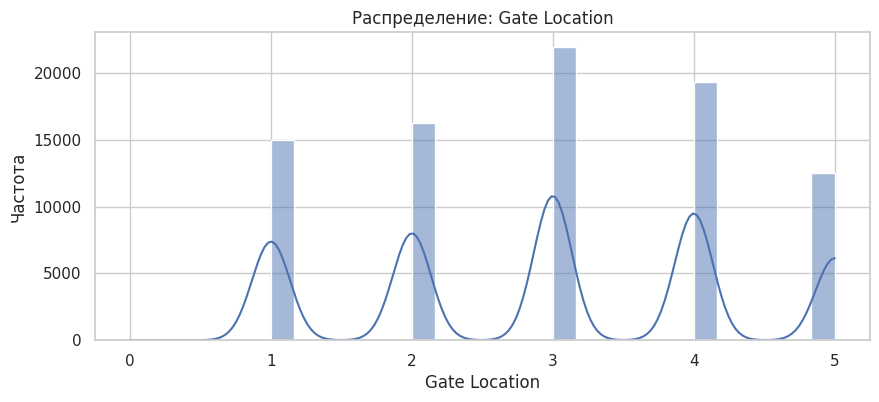

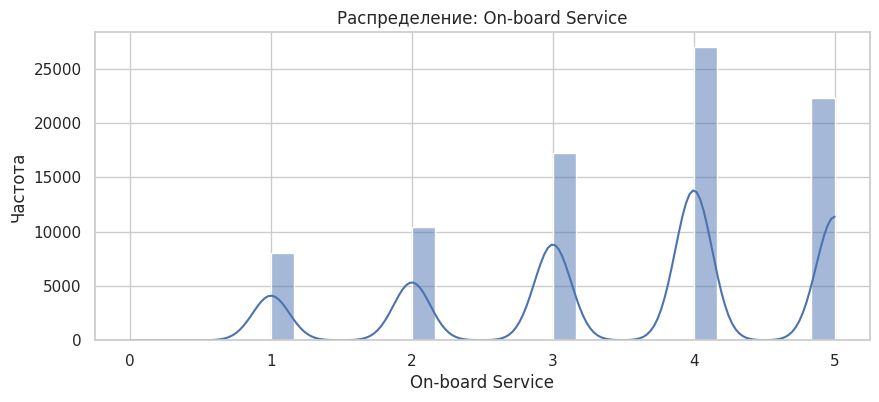

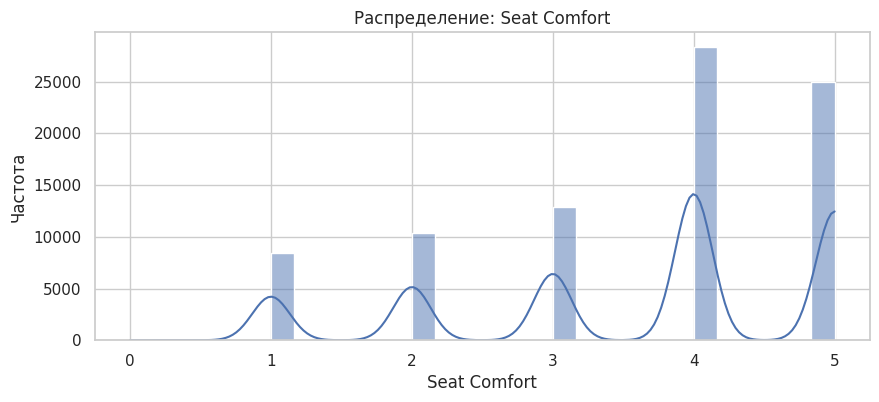

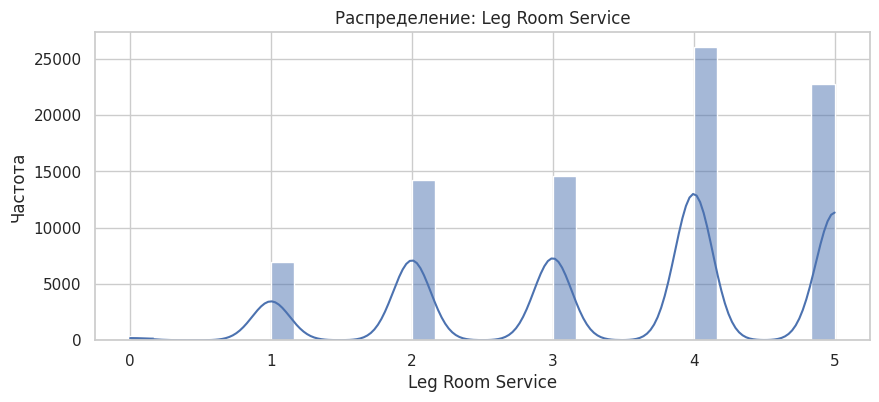

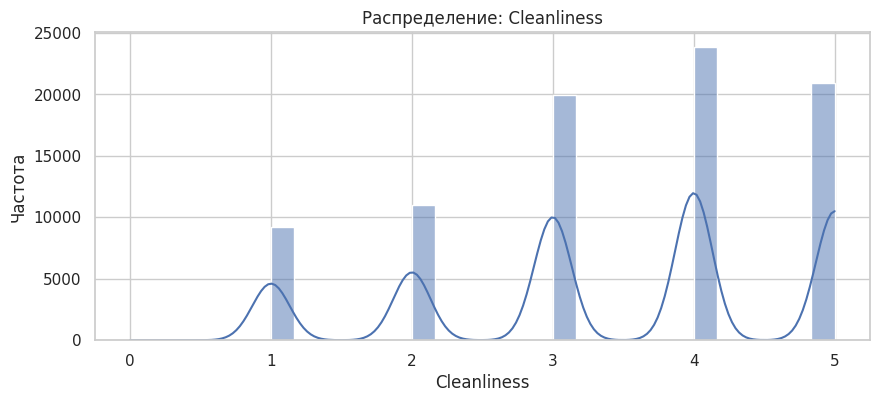

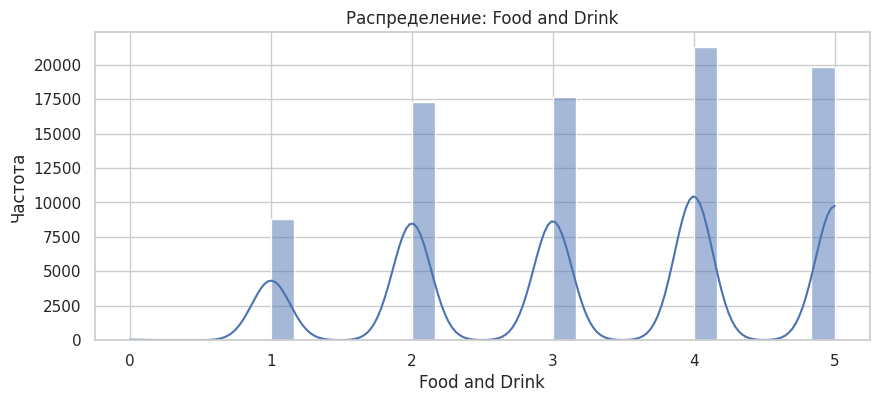

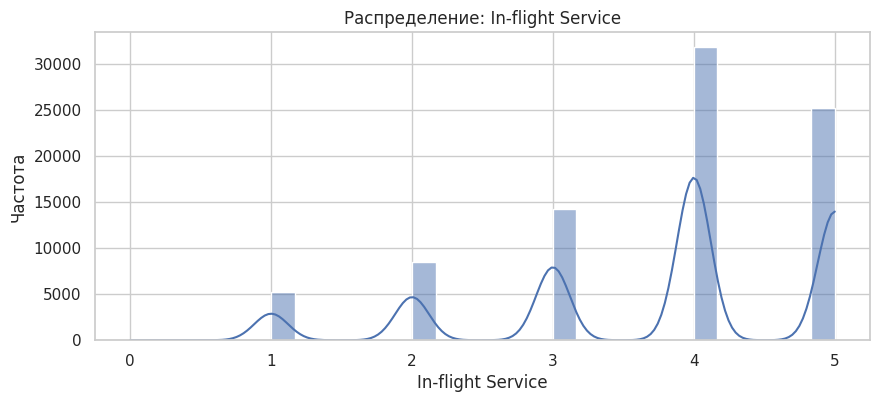

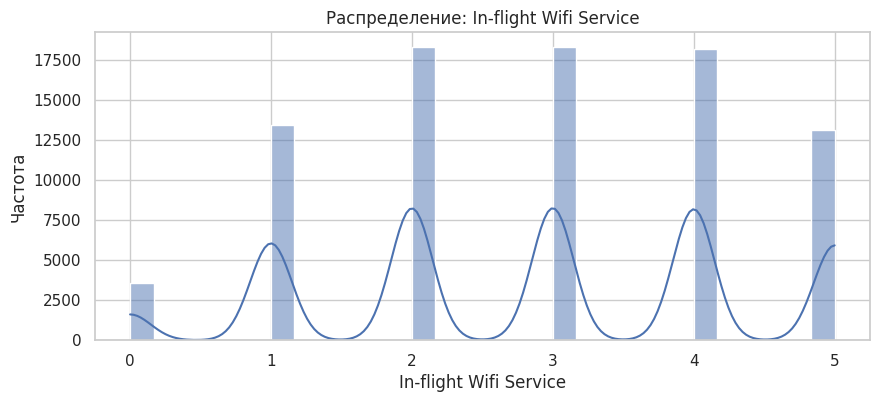

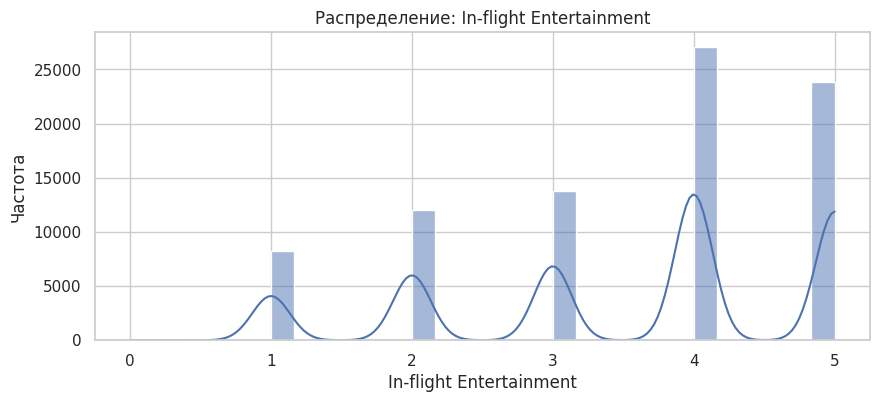

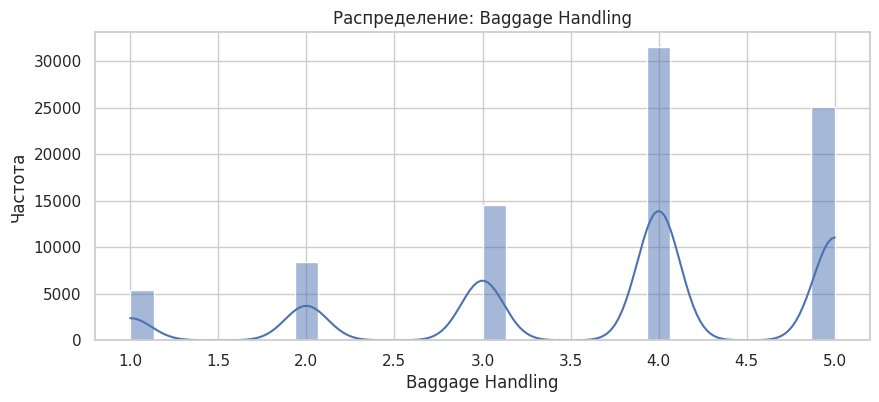

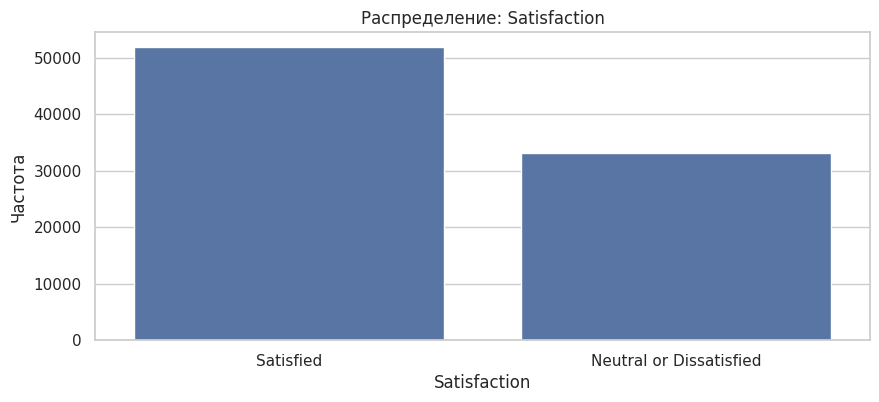

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for column in train_data.columns:
    plt.figure(figsize=(10, 4))
    if train_data[column].dtype in ['float64', 'int64']:
        sns.histplot(train_data[column], kde=True, bins=30)
        plt.title(f"Распределение: {column}")
        plt.xlabel(column)
        plt.ylabel("Частота")
    else:
        sns.countplot(data=train_data, x=column)
        plt.title(f"Распределение: {column}")
        plt.xlabel(column)
        plt.ylabel("Частота")
    plt.show()

In [34]:
for dataset in [train_data, test_data]:
    dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 0}).astype('int')
    dataset['Class'] = dataset['Class'].replace({'Economy': 0, 'Economy Plus': 1, 'Business': 2}).astype('int')
    dataset['Customer Type'] = dataset['Customer Type'].replace({'First-time': 0, 'Returning': 1}).astype('int')
    dataset['Type of Travel'] = dataset['Type of Travel'].replace({'Personal': 0, 'Business': 1}).astype('int')

train_data['Satisfaction'] = train_data['Satisfaction'].replace({'Satisfied': 1, 'Neutral or Dissatisfied': 0}).astype('int')

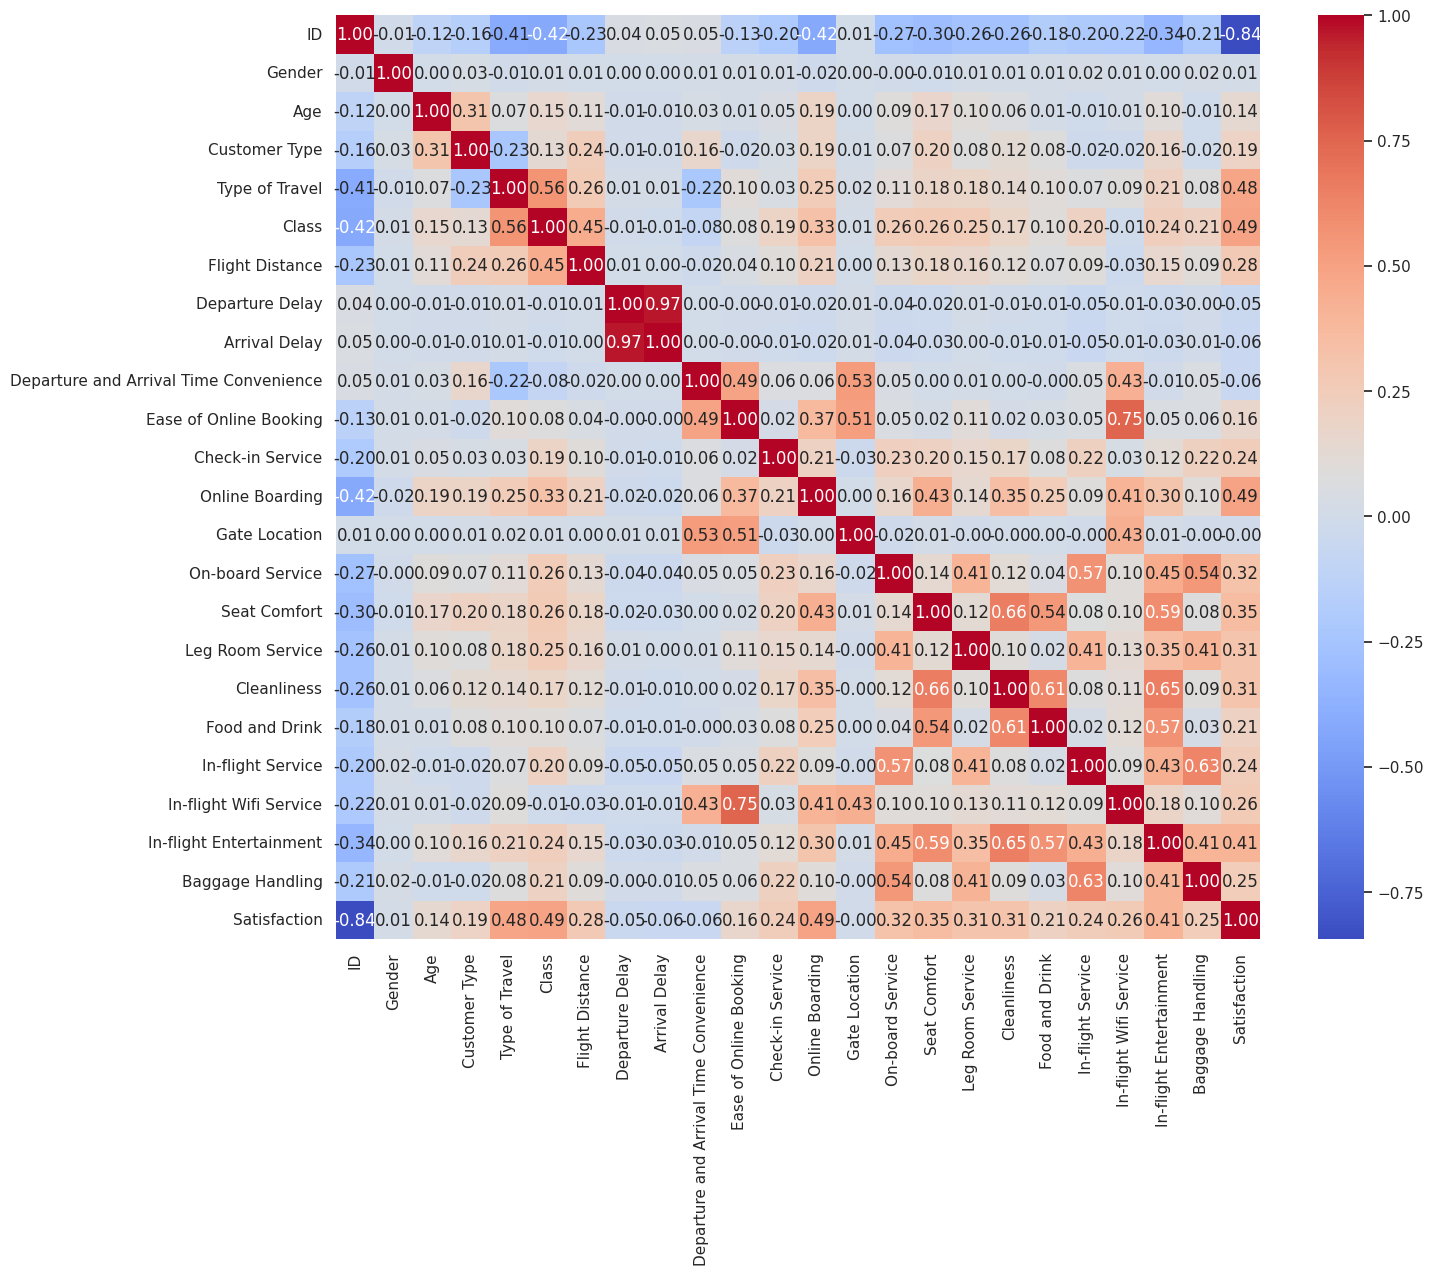

In [35]:
plt.figure(figsize=(15, 12))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [36]:
columns_to_drop = ['Arrival Delay', 'Departure Delay', 'Gender', 'Gate Location']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

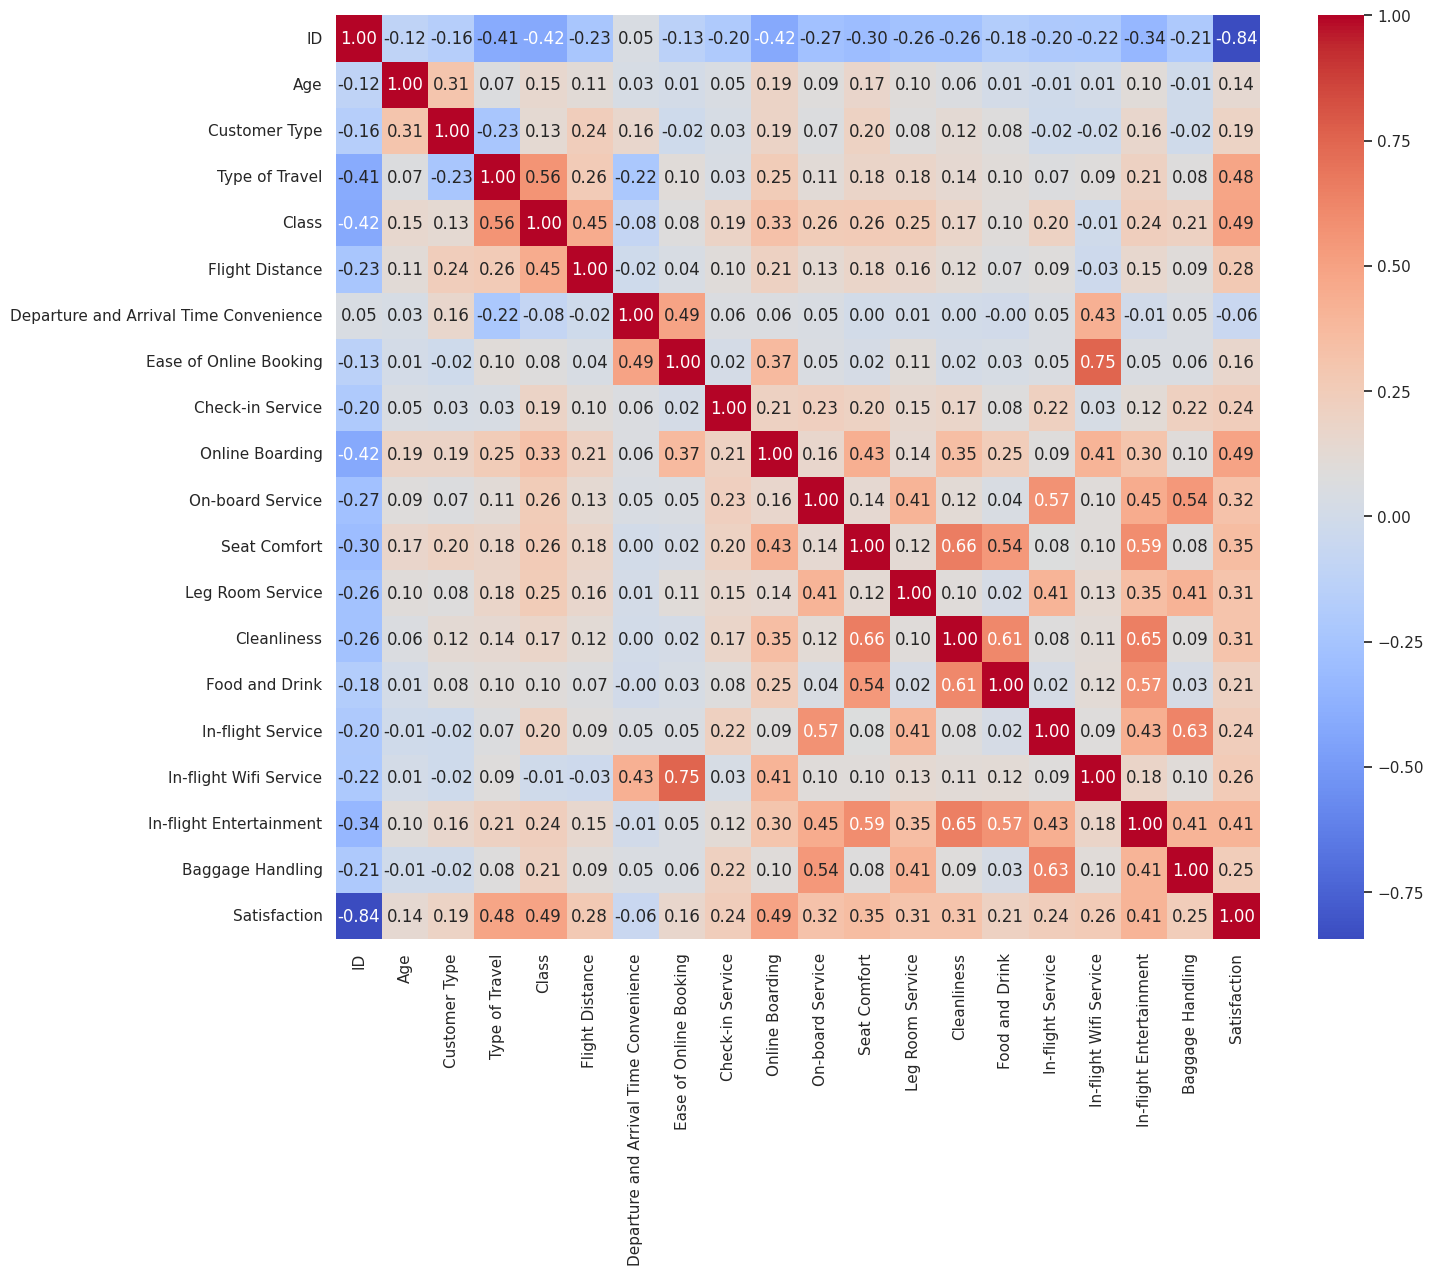

In [37]:
plt.figure(figsize=(15, 12))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [38]:
X = train_data.drop(columns=['Satisfaction', 'ID'])
y = train_data['Satisfaction']
X_test = test_data.drop(columns=['ID'])

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

In [41]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=250,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced'
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250, random_state=42)

In [42]:
y_val_pred = model.predict(X_val)
f1 = f1_score(y_val, y_val_pred, average='micro')
print(f'F1-score: {f1}')


F1-score: 0.9644622264062133


In [43]:
# cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1_micro')
# print(f'кросс-валидация: {np.mean(cv_scores)}')


In [44]:
test_predictions = model.predict(X_test_scaled)

submission = pd.DataFrame({'ID': test_data['ID'], 'Satisfaction': test_predictions})
submission.to_csv('submission.csv', index=False)
